In [1]:
# My py files
import env
import os
import wrangle as w
# Load Datasets
from pydataset import data
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling: Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Modeling: Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE
# Modeling
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

## **Acquire** -> Preparation -> Explore -> Evaluation -> Modeling -> Planning & Delivery

In [2]:
diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds.shape

(53940, 10)

## <s>Acquire</s> -> **Preparation** -> Explore -> Evaluation -> Modeling -> Planning & Delivery

In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds.sample(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
51194,0.81,Premium,J,VS1,61.7,61.0,2350,5.94,5.90,3.65
5053,0.31,Ideal,H,SI1,62.7,56.0,573,4.38,4.33,2.73
2436,0.73,Very Good,E,VS2,62.9,58.0,3184,5.70,5.75,3.60


In [6]:
train, validate, test = w.splitter(diamonds)

Dataframe: (53940, 10) 100%
Train: (34521, 10) | ~60%
Validate: (8631, 10) | ~20%
Test: (10788, 10) | ~20%


In [7]:
train.color.unique()

['F', 'G', 'E', 'D', 'H', 'I', 'J']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [8]:
train.clarity.unique()

['VS2', 'SI1', 'VS1', 'SI2', 'VVS1', 'VVS2', 'IF', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

#### Encode Categorical Data

In [9]:
dummies = pd.get_dummies(train[['cut','clarity']],dtype=int)
train = pd.concat([train,dummies], axis=1)

In [10]:
cat_cols, num_cols = w.organize_columns(train)

In [11]:
num_cols.remove('carat')
num_cols.remove('cut')

In [12]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,cut_Good,cut_Fair,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
29684,0.32,Ideal,F,VS2,62.6,57.0,707,4.41,4.37,2.75,...,0,0,0,0,0,0,1,0,0,0
7696,1.01,Good,F,SI1,64.2,58.0,4276,6.33,6.31,4.06,...,1,0,0,0,0,0,0,1,0,0
35861,0.40,Ideal,F,VS1,61.8,54.0,917,4.75,4.77,2.94,...,0,0,0,0,0,1,0,0,0,0
50772,0.71,Fair,G,SI2,64.4,58.0,2300,5.59,5.56,3.59,...,0,1,0,0,0,0,0,0,1,0
41244,0.34,Ideal,E,VVS1,61.1,56.0,1208,4.52,4.55,2.77,...,0,0,0,1,0,0,0,0,0,0


## <s>Acquire</s> -> <s>Preparation</s> -> **Explore** -> Evaluation -> Modeling -> Planning & Delivery

<Axes: xlabel='price', ylabel='Count'>

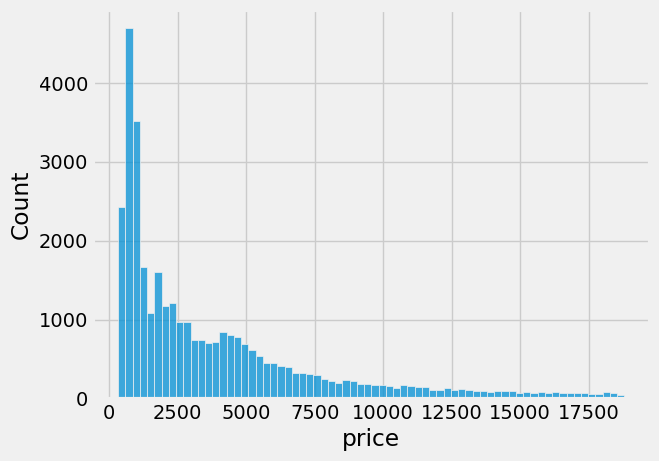

In [13]:
sns.histplot(data=train,x='price')

# gamma distribution

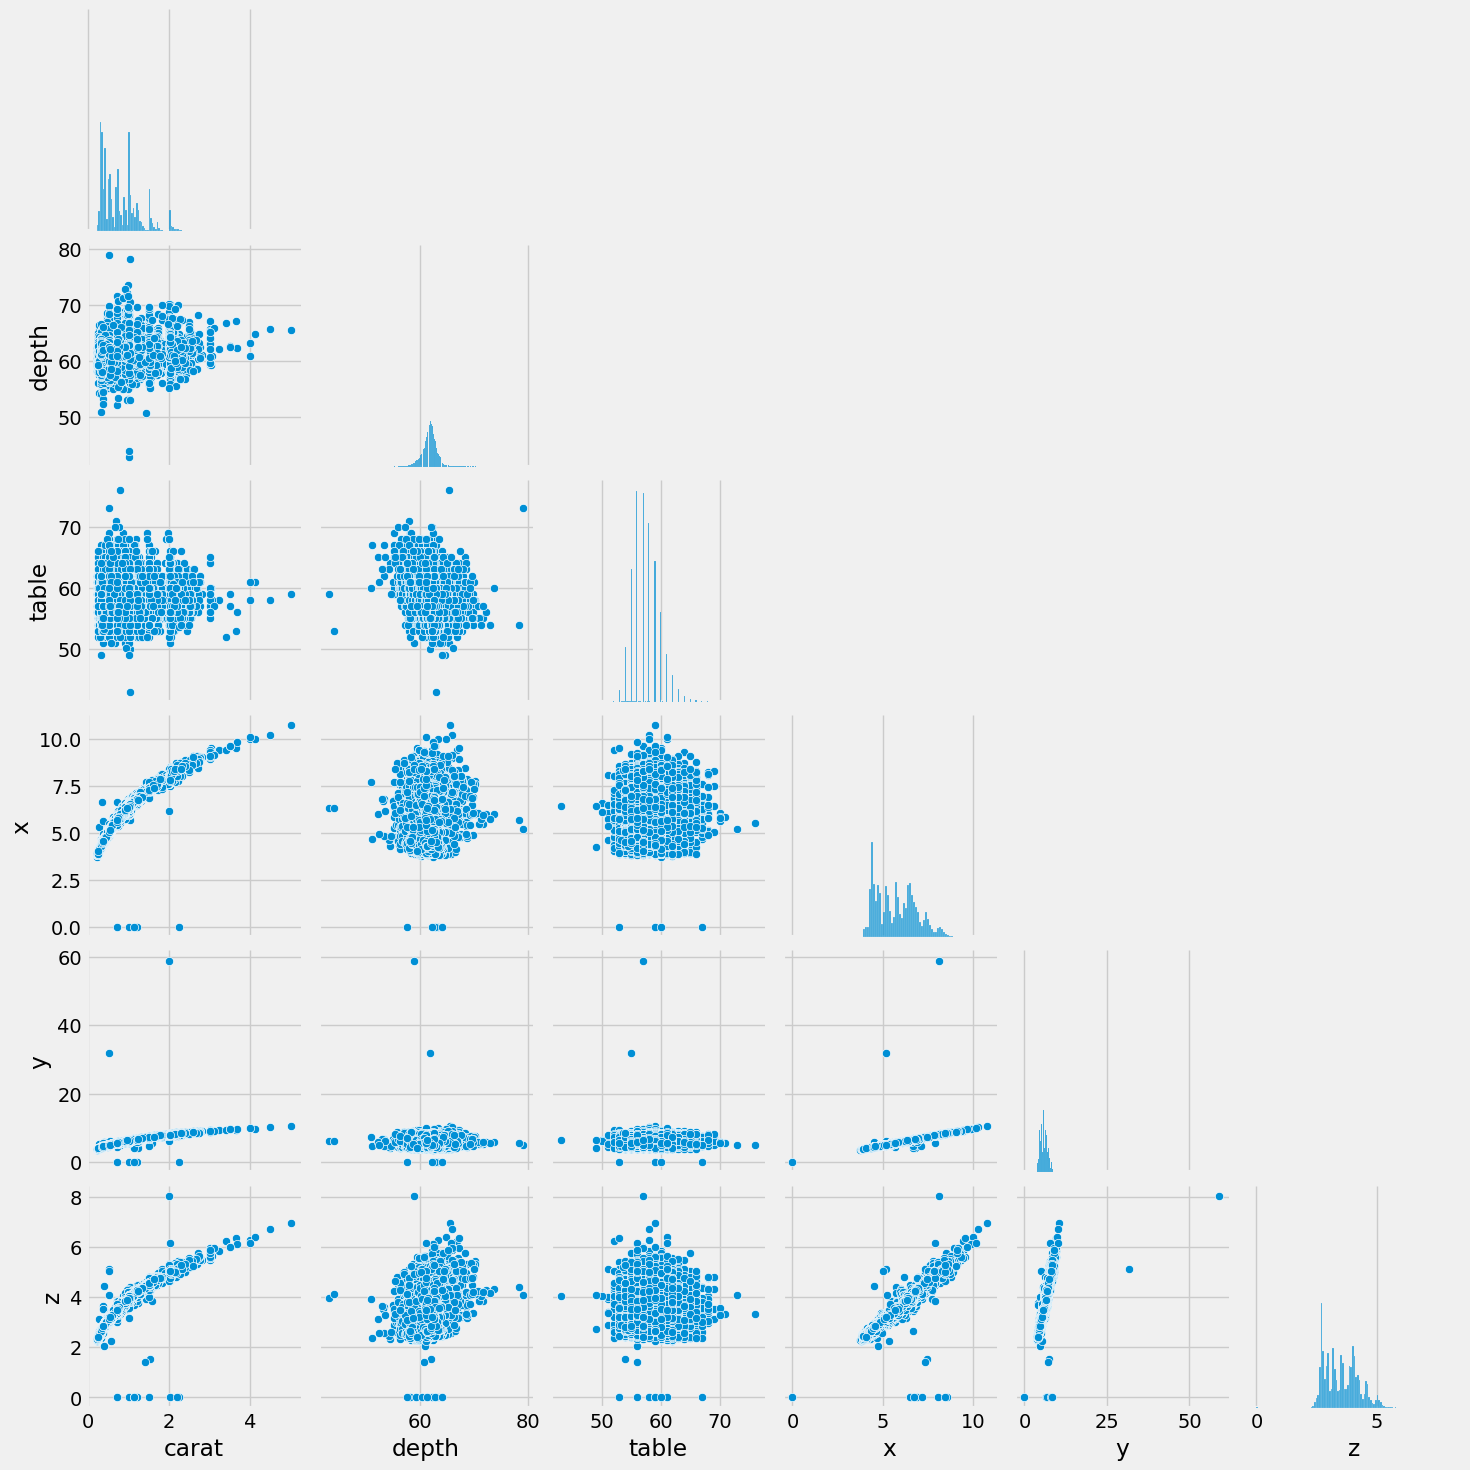

In [14]:
sns.pairplot(train[['carat','depth','table','x','y','z']],corner = True)

<Axes: xlabel='price', ylabel='cut'>

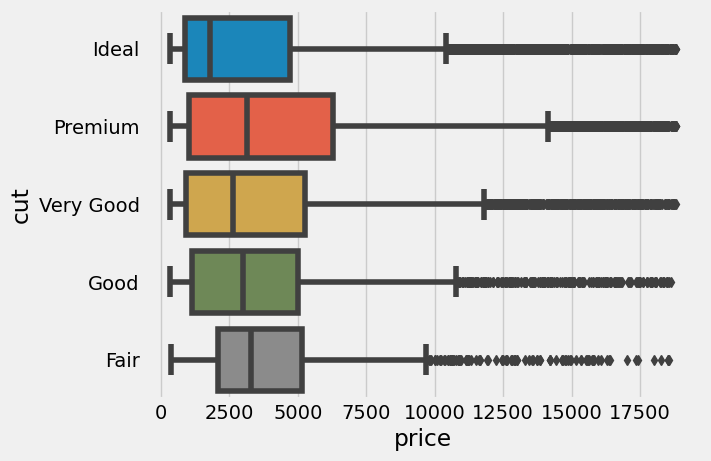

In [15]:
sns.boxplot(data=train,x='price',y='cut')

In [16]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,cut_Good,cut_Fair,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
29684,0.32,Ideal,F,VS2,62.6,57.0,707,4.41,4.37,2.75,...,0,0,0,0,0,0,1,0,0,0
7696,1.01,Good,F,SI1,64.2,58.0,4276,6.33,6.31,4.06,...,1,0,0,0,0,0,0,1,0,0
35861,0.40,Ideal,F,VS1,61.8,54.0,917,4.75,4.77,2.94,...,0,0,0,0,0,1,0,0,0,0
50772,0.71,Fair,G,SI2,64.4,58.0,2300,5.59,5.56,3.59,...,0,1,0,0,0,0,0,0,1,0
41244,0.34,Ideal,E,VVS1,61.1,56.0,1208,4.52,4.55,2.77,...,0,0,0,1,0,0,0,0,0,0


In [17]:
corr_table = train[['carat','depth','table','x','y','z']]

<Axes: >

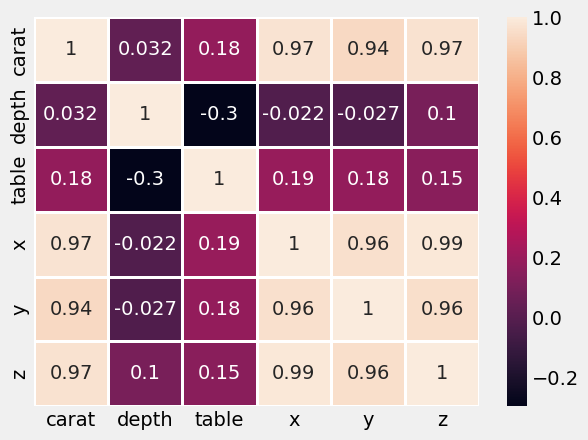

In [21]:
sns.heatmap(corr_table.corr(), linecolor='white', linewidths=2,annot=True)